# 결정 트리


붓꽃품종분류
==
> 분류 : 꽃잎 + 꽃받침 => 품종

0.노트 설정
===

In [1]:
%config InlineBackend.figure_format='retina'

In [2]:
from preamble import *

# 모듈 불러오기

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

데이터 적재
-

iris=load_iris()


In [4]:
cancer = load_breast_cancer()

살펴보기
-
- size(열/행)
- 관측자료~
- 원데이터를 무조건 보기
- 사각 : 정형데이터

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)

In [6]:
print (len(X_train), len(X_test))

426 143


학습 및 모델
-

In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

평가 및 검증
-

* [pandas] (https://pandas.pydata.org/)
* [scikit-learn] (https://scikit-learn.org/stable/)
* [matplotlib] (https://matplotlib.org/)
* [mglearn] (https://github.com/amueller/mglearn)

In [8]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9882629107981221, 0.951048951048951)

위에 있는 tree score : 과대적합

[Text(0.5735294117647058, 0.9, 'worst radius <= 16.795\nsamples = 426\nvalue = [159, 267]\nclass = 양성'),
 Text(0.3235294117647059, 0.7, 'worst concave points <= 0.136\nsamples = 284\nvalue = [25, 259]\nclass = 양성'),
 Text(0.17647058823529413, 0.5, 'radius error <= 1.048\nsamples = 252\nvalue = [4, 248]\nclass = 양성'),
 Text(0.11764705882352941, 0.3, 'smoothness error <= 0.003\nsamples = 251\nvalue = [3, 248]\nclass = 양성'),
 Text(0.058823529411764705, 0.1, 'samples = 4\nvalue = [1, 3]\nclass = 양성'),
 Text(0.17647058823529413, 0.1, 'samples = 247\nvalue = [2, 245]\nclass = 양성'),
 Text(0.23529411764705882, 0.3, 'samples = 1\nvalue = [1, 0]\nclass = 악성'),
 Text(0.47058823529411764, 0.5, 'worst texture <= 25.62\nsamples = 32\nvalue = [21, 11]\nclass = 악성'),
 Text(0.35294117647058826, 0.3, 'worst smoothness <= 0.179\nsamples = 12\nvalue = [3, 9]\nclass = 양성'),
 Text(0.29411764705882354, 0.1, 'samples = 10\nvalue = [1, 9]\nclass = 양성'),
 Text(0.4117647058823529, 0.1, 'samples = 2\nvalue = [2, 

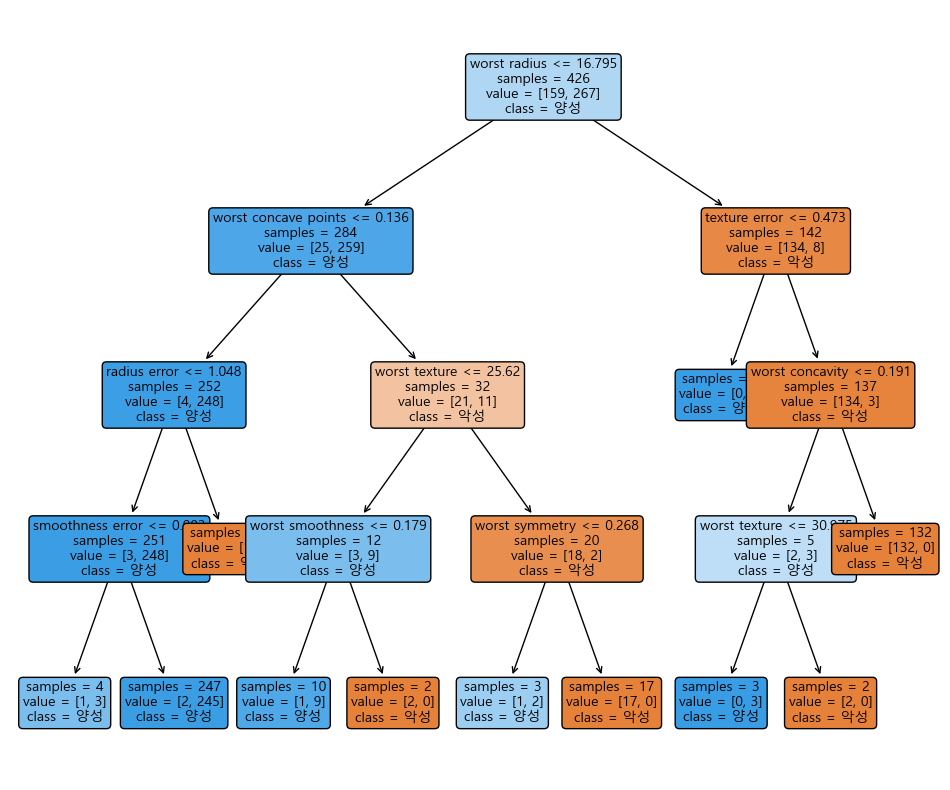

In [9]:
plt.figure(figsize=(12, 10))
plot_tree(tree, class_names=["악성", "양성"],
          feature_names=cancer.feature_names.tolist(),
          impurity=False, filled=True, rounded=True, fontsize=10)

> 분류: 주식이 오를까 내릴까 (맞-맞, 맞-틀, 틀-틀, 틀-맞 : 검증과정이 ) 
: 현상유지도 내리는 거임. 오르는 걸 제외하고 현상유지든 내리든 안 오르면 내리는 거임 : 이진분류
: 데이터에 대한 조작적 정의를 내려야 함
> 회귀 : 삼성전자 주식이 5분 후 오를가 내릴까 (오차에 관련된 문제)

>>> ex.당근 : 식물학자 : 붓꽃 품종 알고 싶다 : 답안지에 품종 있어야 dataset 안에 품종이 column으로 다 있어야 함.
>>> 값이 없는 레이블 : 지워도 되긴 함
>>> 근데 만약 bias 있는 채로 레이블 많이 없으면 그냥 레이블 채우란 소리
>>> 데이터 unit 단위 다 똑같이 맞춰야 함. 
>>> scikit-learn : sklearn에서 dataset이 문제면 답안지는 target, target_name 등


In [10]:
##어딘가에 잘라놓아야 함 : 많이 쓰임
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

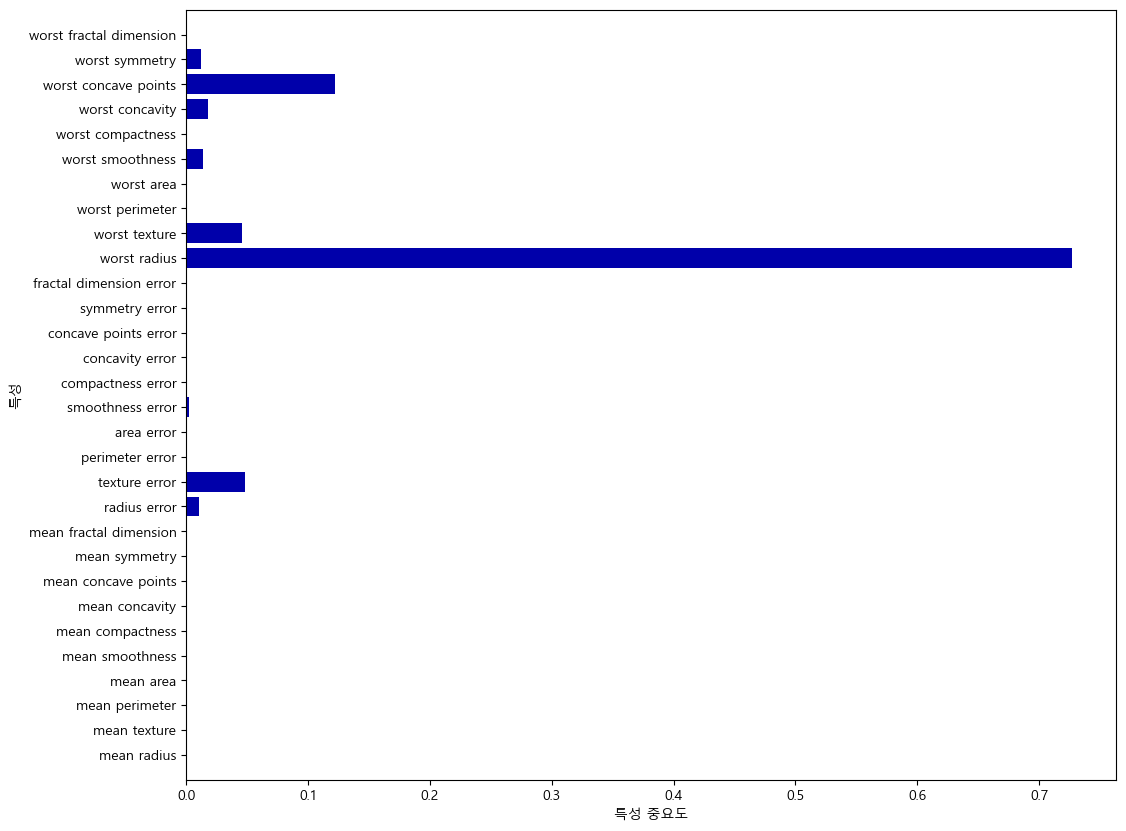

In [11]:
plt.figure(figsize=(12, 10))
plot_feature_importances_cancer(tree)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [13]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

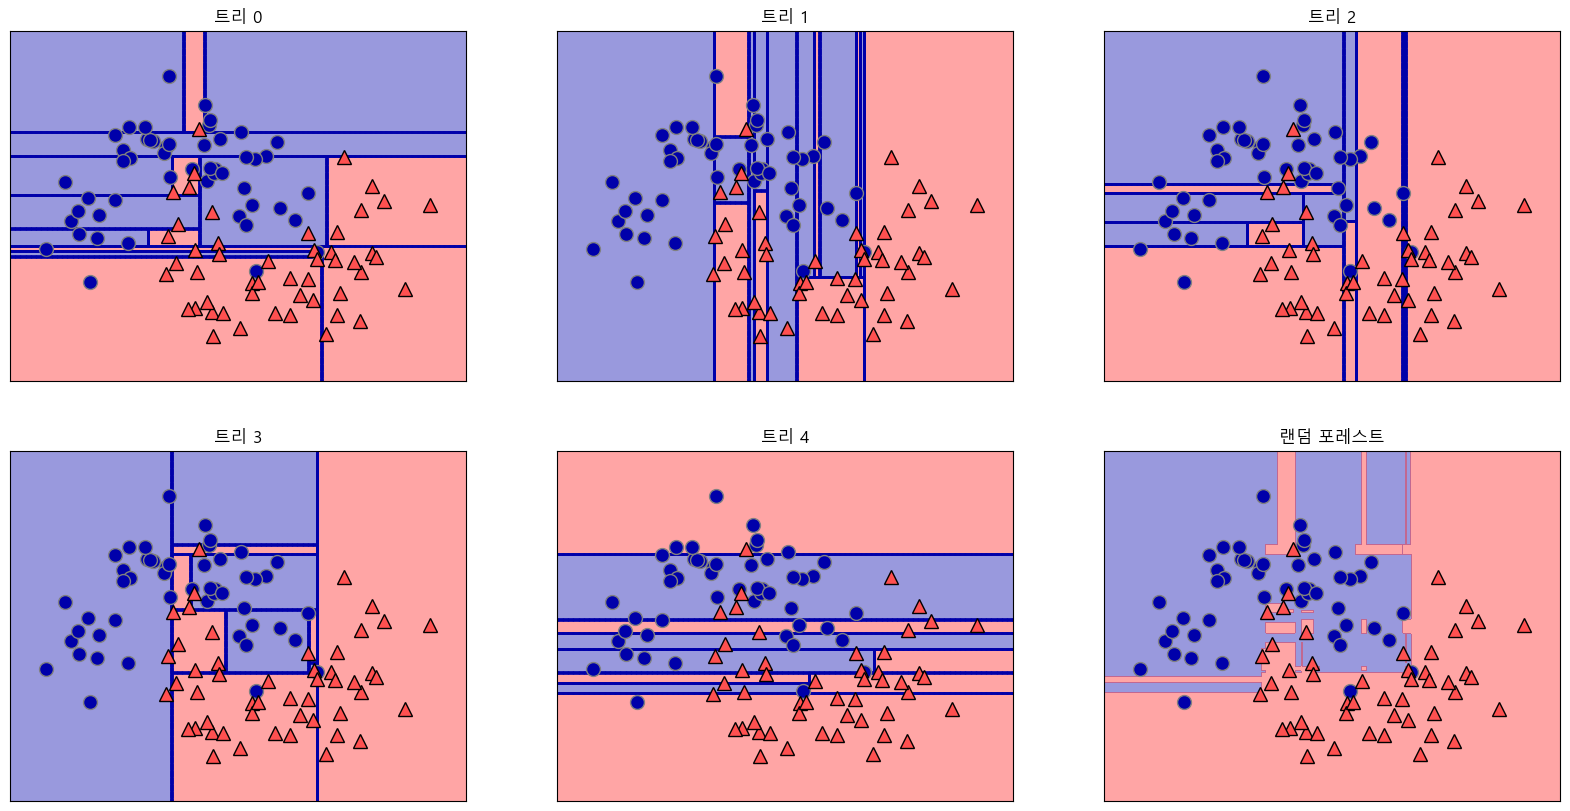

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"트리 {i}")
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes [-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
forest.score(X_train, y_train), forest.score(X_test, y_test)

(1.0, 0.958041958041958)